In [2]:
# Netflix
file1 = open(r'C:\Users\DELL\Downloads\Compressed\archive (1)\combined_data_1.txt', 'r',  encoding="utf8")
Lines = file1.readlines()
print(len(Lines))

24058263


### Preprocessing

In [3]:
from tqdm import tqdm
movie_list= []
user_list = []
time_list = []
count = 0
movie_id = ""
for i in tqdm(range(0, len(Lines))):
    count += 1
    if(Lines[i][-2:-1])==':':
        movie_id = int(Lines[i][:-2])
    else:
        movie_list.append(movie_id)
        user_list.append(int(Lines[i].split(",")[0]))
        time_list.append(Lines[i].split(",")[2])
    
print(len(user_list))
print(len(movie_list))
print(len(time_list))

100%|██████████████████████████████████████████████████████████████████| 24058263/24058263 [00:45<00:00, 533813.51it/s]

24053764
24053764
24053764


In [4]:
print(type(movie_list[0]), movie_list[0])
print(type(user_list[0]), user_list[0])
print(type(time_list[0]), time_list[0])

<class 'int'> 1
<class 'int'> 1488844
<class 'str'> 2005-09-06



In [ ]:
import networkx as nx
G = nx.Graph()

In [12]:
movie_degree_dict = {}
user_degree_dict = {}
probability_dict = {}
total_degree = 0
count = 0
for i in tqdm(range(0, len(movie_list))):
    count += 1
    node1 = movie_list[i]
    node2 = user_list[i]
    if node1 not in movie_degree_dict:
        movie_degree_dict[node1] = 0
    movie_degree_dict[node1] += 1
    
    if node2 not in user_degree_dict:
        user_degree_dict[node2] = 0
    user_degree_dict[node2] += 1
    
    total_degree += 2
    probability_dict[node2] = user_degree_dict[node2]/total_degree
    
#     if count == 10:
#         print(movie_degree_dict)
#         print(user_degree_dict)
#         print(probability_dict)
#         break
    

100%|██████████████████████████████████████████████████████████████████| 24053764/24053764 [00:32<00:00, 743010.40it/s]


In [13]:
print(len(user_degree_dict.values()))
print(len(probability_dict))

470758
470758


In [62]:
# for key, value in probability_dict.items():
#     print(key, value)

### Network Evolution : Probability vs Destination Degree

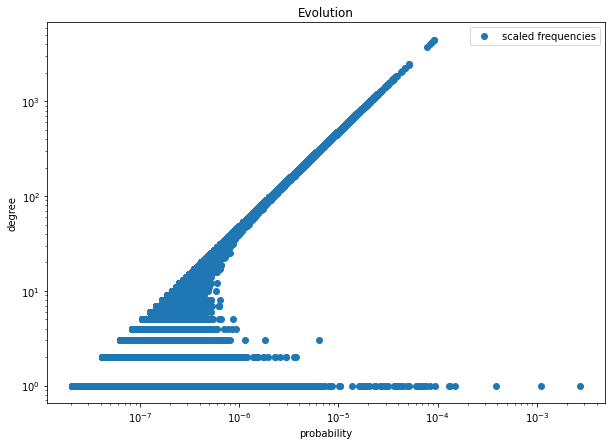

In [14]:
import matplotlib.pyplot as plt 
import matplotlib
# plt.scatter(x_axis, y_axis, label = "fraction", color='blue') 
plt.loglog(list(probability_dict.values()), list(user_degree_dict.values()), "o", label = "scaled frequencies") 
# plt.scatter(list(probability_dict.values()), list(movie_degree_dict.values()), label = "scaled frequencies") 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('probability') 

plt.ylabel('degree')
 
plt.title('Evolution')
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)

In [5]:
import networkx as nx
G = nx.Graph()

In [6]:
for edge in tqdm(range(len(user_list))):
    node1=user_list[edge]
    node2=movie_list[edge]
    G.add_edge(node1,node2)
Degree_count_from={}
Degree_count_to={}
Degree_from={}
Degree_to={}
user_list_set=set(user_list)
movie_list_set=set(movie_list)

for x in user_list_set:
  # if(x not in Degree_count_from):
      Degree_from[x]=G.degree(x)
  # else:
  #   print("hi")
  #   break

for y in movie_list_set:
  # if(x not in Degree_count_to):
      Degree_to[y]=G.degree(y)


100%|██████████████████████████████████████████████████████████████████| 24053764/24053764 [01:56<00:00, 207249.97it/s]


### Degree Distribution : User

No handles with labels found to put in legend.


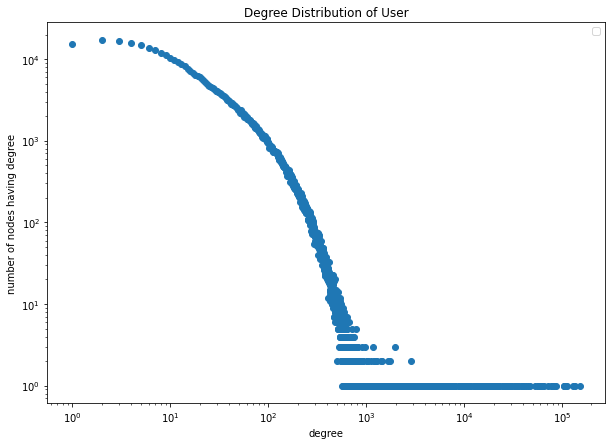

In [9]:
list_of_degrees=list(Degree_from.values())
from_degree_counts={}
for deg in list_of_degrees:
    if(deg in from_degree_counts):
        from_degree_counts[deg]+=1
    else:
        from_degree_counts[deg]=1
max_from_degree_freq=max(from_degree_counts.values())


from_degree_counts1=from_degree_counts.copy()

from_distis=dict((sorted(from_degree_counts1.items())))
from_max_degree_count=max(from_distis.values())
# total_nodes=sum(distis.values())
# from_distis.update((x, round(y/from_max_degree_count,2)) for x, y in from_distis.items())
# x_axis=list(from_distis.keys())[1:len(from_distis.keys())]
# y_axis=list(from_distis.values())[1:len(from_distis.values())]

x_axis=list(from_distis.keys())
y_axis=list(from_distis.values())

import matplotlib.pyplot as plt 
import matplotlib
plt.loglog(x_axis, y_axis,"o") 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('degree') 

plt.ylabel('number of nodes having degree') 
 
plt.title('Degree Distribution of User') 
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)

### Degree Distribution : Movies

No handles with labels found to put in legend.


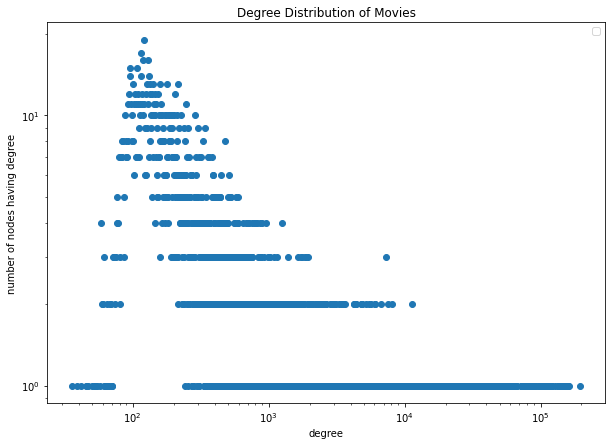

In [10]:
list_of_degrees=list(Degree_to.values())
to_degree_counts={}
for deg in list_of_degrees:
    if(deg in to_degree_counts):
        to_degree_counts[deg]+=1
    else:
        to_degree_counts[deg]=1
max_to_degree_freq=max(to_degree_counts.values())


to_degree_counts1=to_degree_counts.copy()

to_distis=dict((sorted(to_degree_counts1.items())))
to_max_degree_count=max(to_distis.values())
# total_nodes=sum(distis.values())
# to_distis.update((x, round(y/to_max_degree_count,2)) for x, y in to_distis.items())
# x_axis=list(to_distis.keys())[1:len(to_distis.keys())]
# y_axis=list(to_distis.values())[1:len(to_distis.values())]

x_axis1=list(to_distis.keys())
y_axis1=list(to_distis.values())

import matplotlib.pyplot as plt 
import matplotlib
# plt.scatter(x_axis1, y_axis1, label = "fraction") 
plt.loglog(x_axis1, y_axis1,"o" ) 
# plt.xscale("log")
# plt.yscale("log")
plt.xlabel('degree') 

plt.ylabel('number of nodes having degree') 
 
plt.title('Degree Distribution of Movies') 
plt.legend() 
# plt.show() 
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 7)